### Today Objectives:

* Train Test Split
* Polynomial Regression
* Bias,Variance, overfit, underfit and bestfit
* Ridge and Lasso Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
d=load_boston()
d

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
df=pd.read_csv("C:\\Users\\Kanakamma\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv")
df.head(5)

,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [6]:
df=pd.read_csv("C:\\Users\\Kanakamma\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv",skiprows=1)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
d.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
df=pd.DataFrame(d.data,columns=d.feature_names)
df['Target']=d.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
x=df.drop('Target',axis=1)  # input values
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
y=df['Target']    # output values
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [20]:
# # from dictionary 
# x=d.data
# y=d.target

In [59]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [61]:
x_train.head()
x_train.shape

(404, 13)

In [30]:
y_train.shape

(404,)

In [62]:
x_test.shape

(102, 13)

In [32]:
y_test.shape

(102,)

In [63]:
# select the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [64]:
#pass train data into model
model.fit(x_train,y_train)

LinearRegression()

In [65]:
# find the score
print("training score:",model.score(x_train,y_train))

training score: 0.7508856358979673


In [68]:
# find the test score
print("test score:",model.score(x_test,y_test))

# find the score using r-squared
# r-squared: It is a measurement for find the score between actual data and predict data

from sklearn.metrics import r2_score
y_pred=model.predict(x_test)
print("accuaracy is :",r2_score(y_test,y_pred))


test score: 0.6687594935356315
accuaracy is : 0.6687594935356315


### Polynomial Regression:

* It is a non-linear regressin model

In [69]:
d={'eexp':[1,2,3,4,5,6,7,8,9,10],'esal':[4000,3000,6000,5000,3500,15000,20000,30000,50000,100000]}
df=pd.DataFrame(d)
df

,eexp,esal
0,1,4000
1,2,3000
2,3,6000
3,4,5000
4,5,3500
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


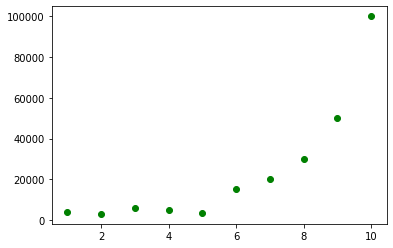

In [71]:
import matplotlib.pyplot as plt
plt.scatter(df['eexp'],df['esal'],color='g')
plt.show()

In [72]:
# linear regression
x=df[['eexp']]
y=df['esal']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [73]:
model.score(x,y)

0.6662846826357485

In [74]:
y_pred=model.predict(x)
y_pred

array([-13700.,  -5400.,   2900.,  11200.,  19500.,  27800.,  36100.,
        44400.,  52700.,  61000.])

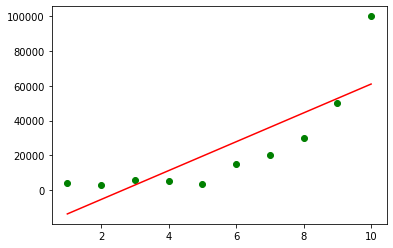

In [75]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,color='r')
plt.show()

In [84]:
# apply the polynomail
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6)
ply_x=poly.fit_transform(x)
ply_x

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01,
        3.20000e+01, 6.40000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01,
        2.43000e+02, 7.29000e+02],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02,
        1.02400e+03, 4.09600e+03],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02,
        3.12500e+03, 1.56250e+04],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03,
        7.77600e+03, 4.66560e+04],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03,
        1.68070e+04, 1.17649e+05],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03,
        5.90490e+04, 5.31441e+05],
       [1.00000e+00, 1.00000

In [85]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(ply_x,y)

LinearRegression()

In [86]:
model.score(ply_x,y)

0.9974853532082258

In [87]:
y_pred=model.predict(ply_x)

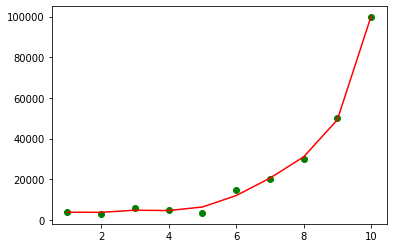

In [88]:
plt.scatter(x,y,color='g')
plt.plot(x,y_pred,color='r')
plt.show()